In [1]:
# Import main packages
import sys, os
sys.path.insert(1, os.path.abspath('..') )
from ECO import diagnostics as eco
from ECO.utils import config_parser, open_datasets, get_namelist
import xarray as xr
import xgcm
import numpy as np

# Import matplotlib for plotting and functions to override default values
import matplotlib.pyplot as plt
from plot_utils import update_plotstyle, cmap_OB
cmap_OB=cmap_OB(); update_plotstyle()

In [6]:
exp_prefix = 'EXP00'#,'EXP01'] # Import all files with this prefix
exp_suffix = '_rest6m2000_1'#,'_rest6m2000_1']
ds = open_datasets(exp_prefix, exp_suffix, components = ['metrics', 'masks','properties','trends','postprocessed'])#,'moc'])
# if type(ds) != dict: 
#     ds={exp_prefix+exp_suffix:ds}

HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 494 in H5O__attr_open_by_name(): can't locate attribute: '_QuantizeBitGroomNumberOfSignificantDigits'
    major: Attribute
    minor: Object not found
HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5A.c line 5

HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 494 in H5O__attr_open_by_name(): can't locate attribute: '_QuantizeBitGroomNumberOfSignificantDigits'
    major: Attribute
    minor: Object not found
HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5A.c line 5

In [7]:
%matplotlib inline
kwargs = config_parser(exp_prefix, exp_suffix=exp_suffix)

_metrics = {('X',): ['e1tm', 'e1um', 'e1vm', 'e1fm'],
     ('Y',): ['e2tm', 'e2um', 'e2vm', 'e2fm'],
     ('Z',): ['e3tm', 'e3um', 'e3vm', 'e3wm']}

grid = xgcm.Grid(ds, metrics=_metrics, periodic=False)
grid_ops = eco.Grid_ops(grid, maskargs={'mask':'nan'})
grid = grid_ops._update({'Z':ds['e3tm_1d']})

p=eco.Properties(grid_ops,{'X': ds.glamt, 'Y':ds.gphit,'Z': ds.depth_1d}, eos_properties=kwargs[2]['eos'])
e=eco.Energetics(grid_ops, p)
# define xgcm configuration based on dataset metrics

dt=ds.t.diff('t')[0]/86400/360
t_years=np.arange(1,(len(ds.t)+2)*dt,dt)

Update processing configuration with subconfig_rest6m2000_1


In [19]:
#vars = ['KN2_convective','KN2_diffusive','C']#'Gh_surf','Gh_hdiff','Gh_qsr','C']
magn=1e9
print("Mean of timeslices")
print('Convection  Diffusion  Conversion')
for exp in ds:
    # vars = {}
    # vars['Convection'] = - properties[exp].global_mean(ds[exp]['KN2_convective'], Vmask=ds[exp].mask_bd_w)
    # vars['Diffusion'] = (- properties[exp].global_mean(ds[exp]['KN2_diffusive'], Vmask=ds[exp].mask_bd_w) 
    # + ds[exp]['Gh_surf'] 
    # + properties[exp].global_mean(ds[exp]['Gh_hdiff'],Vmask=ds[exp].mask_bd_t )
    # + properties[exp].global_mean(ds[exp]['Gh_qsr'],Vmask=ds[exp].mask_bd_t ))
    # vars['Conversion'] = properties[exp].global_mean(ds[exp]['C'],Vmask=ds[exp].mask_bd_t )
    print('-----------------')
    print(exp)
    # for var in vars:
    #print(var, '[1e-9m/s]')
    time_means = []
    for time in [(0,40), (40,800), (800,4100)]:
        #time_means.append(vars[var][slice(*time)].mean('t').values*magn)
        print('{}-{}: {:.4f}  {:.4f}  {:.4f}'.format(int(time[0]/2),int(time[1]/2),
                                                ds[exp]['KN2_convective_gm'][slice(*time)].mean('t').values*magn,
                                                (ds[exp]['KN2_diffusive_gm']+ds[exp]['Gh_surf_gm']+ds[exp]['Gh_hdiff_gm']+ds[exp]['Gh_qsr_gm'])[slice(*time)].mean('t').values*magn,
                                                ds[exp]['C_gm'][slice(*time)].mean('t').values*magn))
    

Mean of timeslices
Convection  Diffusion  Conversion
-----------------
EXP00_rest6m2000_1
0-20: -0.9646  1.1957  -0.7856
20-400: -0.0803  0.1488  -0.0805


400-2050: -0.0165  0.0244  -0.0082
-----------------
EXP01_rest6m2000_1
0-20: -0.9471  1.2011  -0.8093
20-400: -0.0728  0.1581  -0.0954
400-2050: -0.0134  0.0301  -0.0165


In [11]:
dhTdz = p.dh_TZ(ds.to,ds.so,ds.depth)#grid.derivative(dh_T,'Z',boundary='fill',fill_value=0).compute()
dhSdz = p.dh_SZ(ds.to,ds.so,ds.depth)#grid.derivative(dh_S,'Z',boundary='fill',fill_value=0).compute()

dh_T = p.dh_T(ds.to,ds.so,ds.depth,Z_r=ds.zg_0).compute()
dh_S = p.dh_S(ds.to,ds.so,ds.depth,Z_r=ds.zg_0).compute()
dhTdz1 = grid.derivative(dh_T,'Z',boundary='fill',fill_value=0).compute()
dhSdz1 = grid.derivative(dh_S,'Z',boundary='fill',fill_value=0).compute()

/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [115]:
depth_w=-grid_ops.get_depth_from_metric(ds.e3wm).compute()
Tw=grid_ops._shift_position(ds['to_s'],'W').compute()
Sw=grid_ops._shift_position(ds['so_s'],'W').compute()
dhTdz = p.dh_TZ(Tw,Sw,depth_w)#grid.derivative(dh_T,'Z',boundary='fill',fill_value=0).compute()
dhSdz = p.dh_SZ(Tw,Sw,depth_w)#grid.derivative(dh_S,'Z',boundary='fill',fill_value=0).compute()

dh_T = p.dh_T(ds['to_s'],ds['so_s'],ds.depth,Z_r=ds.zg_0)
dh_S = p.dh_S(ds['to_s'],ds['so_s'],ds.depth,Z_r=ds.zg_0)
dh_Tw = p.dh_T(Tw,Sw,depth_w,Z_r=ds.zg_0)
dh_Sw = p.dh_S(Tw,Sw,depth_w,Z_r=ds.zg_0)
dhTdz1 = grid.derivative(dh_T,'Z',boundary='fill',fill_value=0).compute()
dhSdz1 = grid.derivative(dh_S,'Z',boundary='fill',fill_value=0).compute()
dhTdz2 = grid.derivative(dh_Tw,'Z',boundary='fill',fill_value=0).compute()
dhSdz2 = grid.derivative(dh_Sw,'Z',boundary='fill',fill_value=0).compute()
# dhT_corr = -9.81*p.eos_properties['thermal_expansion']*p.eos_properties['thermobaric_T']*ds.zg_0/2
print("convection mask")
mask_avt= (grid_ops.nan_mask(ds.k_evd)*ds.k_evd/100).compute()
mask_avt_invert=((ds.mask_bd_w)*((-(mask_avt-1)).fillna(1))).compute()
#ds_proc = xr.Dataset(coords = ds.coords, attrs = ds.attrs)

print("Integration by hand to obtain downward flux")
FT_bot_to_top = np.nan*np.ones(ds.e3wm.shape)
FS_bot_to_top = np.nan*np.ones(ds.e3wm.shape)
FT_surfaceflux = np.ones(ds.e3wm[:,0].shape)
FS_surfaceflux = np.ones(ds.e3wm[:,0].shape)

I = ds.z_c.size
QT = (ds.ttrd_zdf*ds.e3tm).values
QS = (ds.strd_zdf*ds.e3tm).values

for i in range(1, I):
    if i==1:
        FT_bot_to_top[:,-1-i] = QT[:,-1-i]
        FS_bot_to_top[:,-1-i] = QS[:,-1-i]
    elif i==I-1:
        FT_bot_to_top[:,-1-i] = QT[:,0]*0# + QT[:,-1-i])
        FS_bot_to_top[:,-1-i] = QS[:,0]*0# + QS[:,-1-i])
        FT_surfaceflux = (FT_bot_to_top[:,1] + QT[:,0]) + (ds.ttrd_qns.values+ds.ttrd_qsr[:,0].values)*ds.e3tm[:,0].values
        FS_surfaceflux = (FS_bot_to_top[:,1] + QS[:,0]) + ds.strd_cdt.values*ds.e3tm[:,0].values
    else:
        FT_bot_to_top[:,-1-i] = (FT_bot_to_top[:,-i] + QT[:,-1-i])
        FS_bot_to_top[:,-1-i] = (FS_bot_to_top[:,-i] + QS[:,-1-i])
FT_bot_to_top = xr.DataArray(FT_bot_to_top, coords=ds.e3wm.coords)
FS_bot_to_top = xr.DataArray(FS_bot_to_top, coords=ds.e3wm.coords)
FT_surfaceflux = xr.DataArray(FT_surfaceflux, coords=ds.e3wm[:,0].coords)
FS_surfaceflux = xr.DataArray(FS_surfaceflux, coords=ds.e3wm[:,0].coords)

print("KN2 conv/diff")
KN2_h_tot = - grid_ops._shift_position(((dhTdz)*FT_bot_to_top + dhSdz*FS_bot_to_top),'T').compute()
KN2_h_tot[:,0] *= 0
KN2_h_tot1 = - grid_ops._shift_position(((dhTdz1)*FT_bot_to_top + dhSdz1*FS_bot_to_top),'T').compute()
KN2_h_tot1[:,0] *= 0
KN2_h_tot2 = - ((dh_T)*grid.derivative(FT_bot_to_top,'Z',boundary='fill',fill_value=0) 
                + dh_S*grid.derivative(FS_bot_to_top,'Z',boundary='fill',fill_value=0)).compute()
#KN2_h_tot2[:,0] *= 0
# KN2_h_bot_to_top_diffusive = - grid_ops._shift_position((dhTdz)*FT_bot_to_top*mask_avt_invert.fillna(0) 
#                                 + dhSdz*FS_bot_to_top*mask_avt_invert.fillna(0),'T').compute()
# KN2_h_bot_to_top_convective = - ((dhTdz)*FT_bot_to_top*mask_avt.fillna(0) 
#                                     +  dhSdz*FS_bot_to_top*mask_avt.fillna(0)).compute() # Not shifted due to nan values
# KN2_h_bot_to_top_diffusive = - grid_ops._shift_position((dhTdz)*FT_bot_to_top*mask_avt_invert.fillna(0) 
#                                 + dhSdz*FS_bot_to_top*mask_avt_invert.fillna(0),'T').compute()
# KN2_h_bot_to_top_convective1 = - (dhTdz1*FT_bot_to_top*mask_avt.fillna(0) 
#                                     +  dhSdz1*FS_bot_to_top*mask_avt.fillna(0)).compute() # Not shifted due to nan values
# KN2_h_bot_to_top_diffusive1 = - grid_ops._shift_position(dhTdz1*FT_bot_to_top*mask_avt_invert.fillna(0) 
#                                 + dhSdz1*FS_bot_to_top*mask_avt_invert.fillna(0),'T').compute()

/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be chan

convection mask
Integration by hand to obtain downward flux
KN2 conv/diff


/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be chan

In [156]:
KN2_h_tot2 = - ((dh_T)*grid.derivative(FT_bot_to_top,'Z',boundary='fill',fill_value=0) 
                + dh_S*grid.derivative(FS_bot_to_top,'Z',boundary='fill',fill_value=0)).compute()
# KN2_h_tot2[:,0] *= 0#
KN2_tot2 = p.global_mean(-1/(9.81)*KN2_h_tot2.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()

/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/proj/climategu/users/x_bensc/Analysis/venv/lib/python3.10/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [142]:

KN2_tot2 = p.global_mean(-1/(9.81)*KN2_h_tot2.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()

In [117]:
KN2_tot = p.global_mean(-1/(9.81)*KN2_h_tot.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()
KN2_tot1 = p.global_mean(-1/(9.81)*KN2_h_tot1.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()
KN2_h_tot2[:,0] *= 0
KN2_tot2 = p.global_mean(-1/(9.81)*KN2_h_tot2.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()

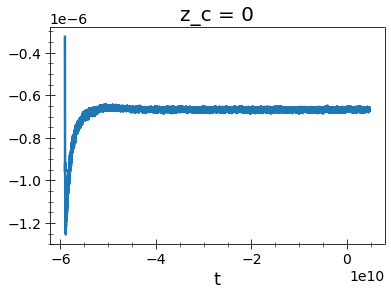

In [63]:
(grid_ops.average(KN2_h_tot2,['X','Y'])[:,0]).plot()

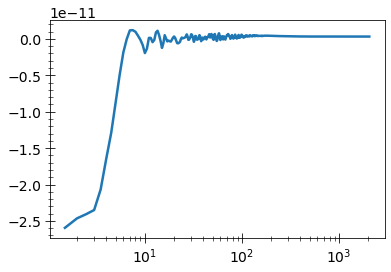

In [145]:
plt.plot(t_years,(KN2_tot1--KN2_tot2)/9.81)
plt.xscale('log')

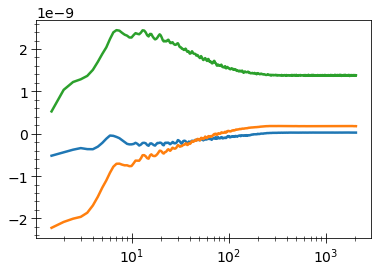

In [153]:
plt.plot(t_years,KN2_tot)
plt.plot(t_years,KN2_tot1)
plt.plot(t_years,-KN2_tot2)
plt.xscale('log')

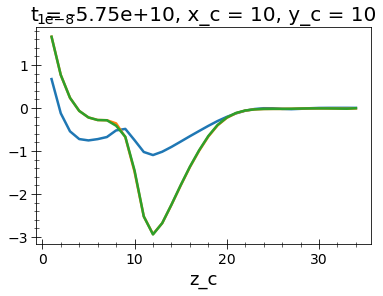

In [116]:

KN2_h_tot[ti,1:,10,10].plot()
KN2_h_tot1[ti,1:,10,10].plot()
KN2_h_tot2[ti,1:,10,10].plot()

In [44]:
Conv = p.global_mean(-1/(9.81)*KN2_h_bot_to_top_convective.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_w).compute()
Conv1 = p.global_mean(-1/(9.81)*KN2_h_bot_to_top_convective1.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_w).compute()
Diff = p.global_mean(-1/(9.81)*KN2_h_bot_to_top_diffusive.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()
Diff1 = p.global_mean(-1/(9.81)*KN2_h_bot_to_top_diffusive1.rolling({'t':2}).mean('t'), Vmask=ds.mask_bd_t).compute()

In [78]:
def dh_TZ_new(p, dT, Z):
    return - 9.81/1026 * (p.eos_properties['thermal_expansion']*(1+p.eos_properties['cabbeling_T']*dT - p.eos_properties['thermobaric_T']*Z ))
dhTdz_new = dh_TZ_new(p, Tw,depth_w)

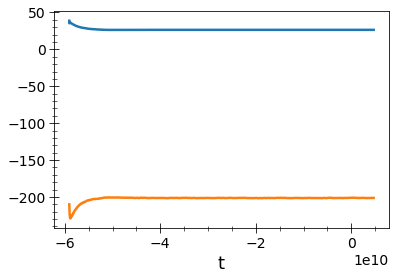

In [169]:
dhTdz.sum(['x_c','y_c','z_f']).plot()
dhTdz1.sum(['x_c','y_c','z_f']).plot()

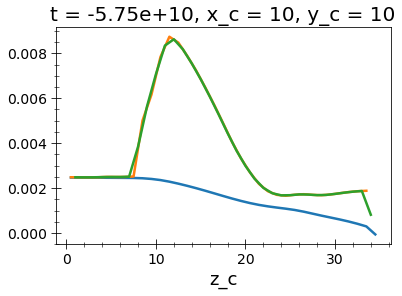

In [166]:
ti=100
# ((-(dh_Tw[ti,:-1,10,10].values-dh_Tw[ti,1:,10,10].values)/ds.e3tm_1d[ti,:-1])[1:]).plot()
dhTdz[ti,1:,10,10].plot()
dhTdz1[ti,1:,10,10].plot()
dhTdz2[ti,1:,10,10].plot()
#(dh_T.differentiate('z_c')/ds.e3tm_1d)[ti,1:-1,10,10].plot()

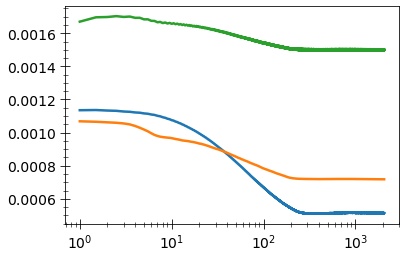

In [66]:
plt.plot(t_years,p.global_mean(dhTdz))
plt.plot(t_years,p.global_mean(dhTdz1))
plt.plot(t_years,p.global_mean(dhTdz2))
plt.xscale('log')

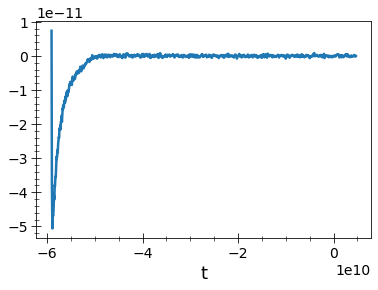

In [41]:
thermobaric_correction.plot()

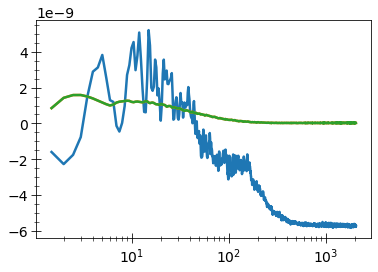

In [45]:
plt.plot(t_years,Diff+ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])
plt.plot(t_years,Diff1+ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])
plt.plot(t_years,ds['KN2_diffusive_gm']+ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])
plt.xscale('log')

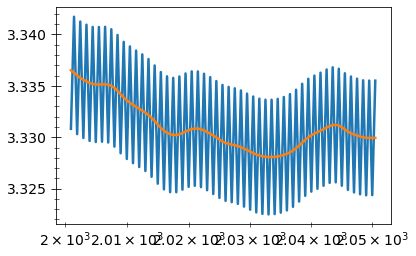

In [94]:
plt.plot(t_years[-100:], p.global_mean(ds['to'][-100:],Vmask=ds.mask_bd_t))
plt.plot(t_years[-100:], p.global_mean(ds['to_s'][-100:],Vmask=ds.mask_bd_t))
plt.xscale('log')

In [150]:
ds['to_s'][0]=ds['to_s'][1]-(ds['to_s'][1]-10)/2
ds['so_s'][0]=ds['so_s'][1]-(ds['so_s'][1]-35)/2
dTdt = ds['to_s'].differentiate('t')
dSdt = ds['so_s'].differentiate('t')
hT = p.dh_T(ds['to_s'],ds['so_s'],ds.depth,Z_r=ds.zg_0)
hS = p.dh_S(ds['to_s'],ds['so_s'],ds.depth,Z_r=ds.zg_0)
dhdt = (p.global_mean(hT*dTdt+hS*dSdt,Vmask=ds.mask_bd_t)/9.81).compute()

In [105]:

ds['to_s'][0]=ds['to_s'][1]-(ds['to_s'][1]-10)/2
dTdt = p.global_mean(ds['to_s'].differentiate('t'),Vmask=ds.mask_bd_t)
hT0 = p.dh_T(ds['t_gm'], ds['s_gm'], ds['depth'], Z_r=ds['zg_0'])
hT0_gm = p.global_mean(hT0,Vmask=ds.mask_bd_t)

thermobaric_correction = (hT0_gm*dTdt/9.81).compute()
# dTdt1 = properties[exp].global_mean(ds[exp]['to_s'].diff('t'))

# thermobaric_correction1={}
# for exp in ds:
#     # ds[exp]['to_s'][0]=ds[exp]['to_s'][1]-(ds[exp]['to_s'][1]-10)/2
#     # dTdt = properties[exp].global_mean(ds[exp]['to_s'].differentiate('t'),Vmask=ds[exp].mask_bd_t)
#     # hT0 = properties[exp].dh_T(ds[exp]['to'], ds[exp]['so'], ds[exp]['depth'], Z_r=ds[exp]['zg_0'])
#     # hT0_gm = properties[exp].global_mean(hT0,Vmask=ds[exp].mask_bd_t)
#     a = properties[exp].eos_properties['thermal_expansion']
#     mu1 = properties[exp].eos_properties['thermobaric_T']
#     cor = 0.5*a*mu1*(ds[exp]['depth'] - ds[exp].zg_0)**2*(ds[exp]['to']-10)
#     thermobaric_correction1[exp] = properties[exp].global_mean(cor,Vmask=ds[exp].mask_bd_t)
# # dTdt1 = properties[exp].global_mean(ds[exp]['to_s'].diff('t'))

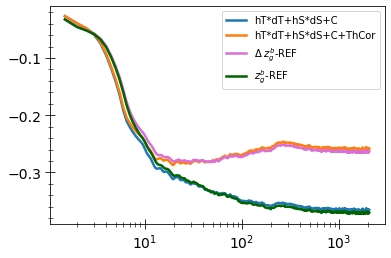

In [151]:
%matplotlib inline 
zg =  ds.zgDE.rolling({'t':2}).mean('t')
zg0 =  ds.zgDE_gm.rolling({'t':2}).mean('t')

C = ds['C_gm']
# plt.plot(t_years, dhdt[exp0].cumsum('t')*86400*180)
plt.plot(t_years, (dhdt.cumsum('t')+C)*86400*180, label='hT*dT+hS*dS+C')
plt.plot(t_years, ((dhdt-thermobaric_correction).cumsum('t')+C)*86400*180, label='hT*dT+hS*dS+C+ThCor')
plt.plot(t_years,(zg-zg0),c='orchid',label='$\Delta\; z_{g}^b$-REF')
plt.plot(t_years,(zg),c='darkgreen',label='$z_{g}^b$-REF')
plt.legend()
plt.plot()
plt.xscale('log')

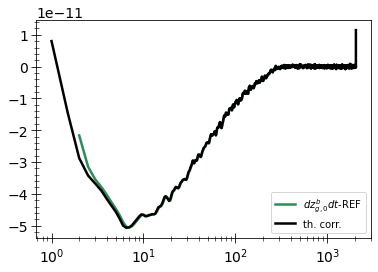

In [99]:
plt.plot(t_years,zg0.differentiate('t'),c='seagreen',label='$dz_{g,0}^bdt$-REF')
plt.plot(t_years,thermobaric_correction,c='k',label='th. corr.')
# plt.plot(t_years,dTdt,c='k',label='th. corr.')
plt.legend()
plt.xscale('log')

In [12]:
magn=1e9
for exp in ds:
    print('-----------------')
    print(exp)
    time_means = []
    for time in [(0,40), (40,800), (800,4100)]:
        #time_means.append(vars[var][slice(*time)].mean('t').values*magn)
        print('{}-{}: {:.4f}'.format(int(time[0]/2),int(time[1]/2),thermobaric_correction[exp][slice(*time)].mean('t').values*magn))

-----------------
EXP00_rest6m2000_1
0-20: -0.0414
20-400: -0.0069
400-2050: 0.0000
-----------------
EXP01_rest6m2000_1
0-20: -0.0417
20-400: -0.0069
400-2050: 0.0000


RuntimeError: NetCDF: Not a valid ID

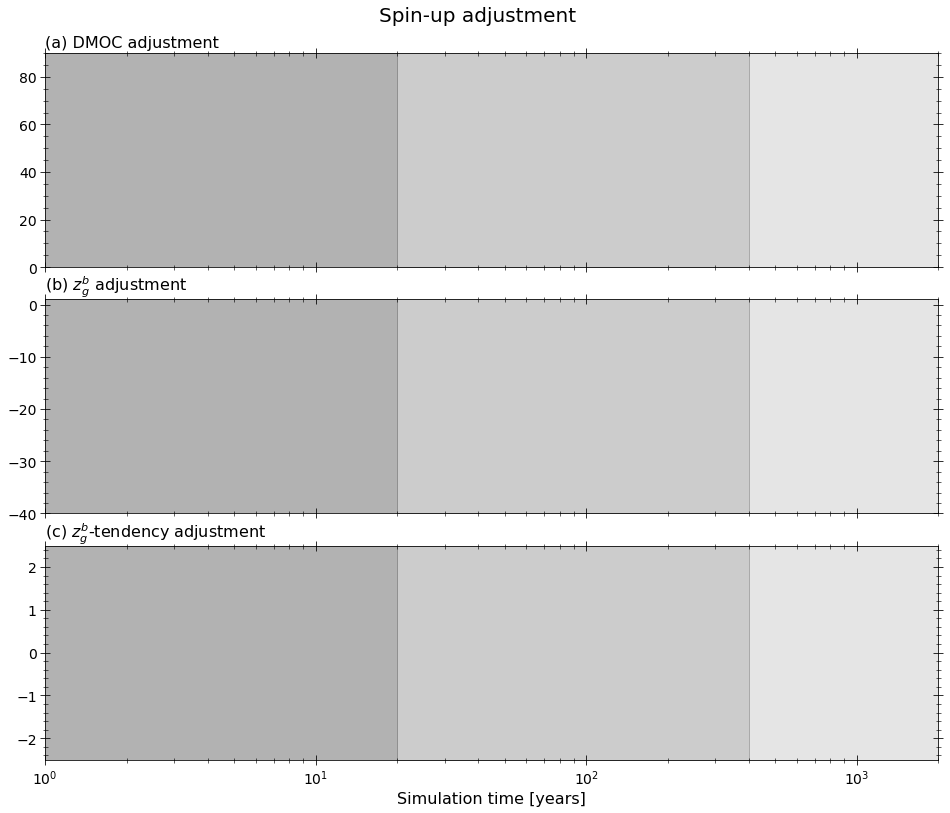

In [15]:
%matplotlib inline
from statsmodels.nonparametric.smoothers_lowess import lowess

fig,ax = plt.subplots(3,figsize=(16,13))
for i, time in enumerate([[0,90],[-40,1],[-2.5,2.5]]):
    ax[i].fill_between([0,20], time[0], time[1],alpha=0.6,color='grey')
    ax[i].fill_between([20,400], time[0], time[1],alpha=0.4,color='grey')
    ax[i].fill_between([400,3000], time[0], time[1],alpha=0.2,color='grey')

    ax[i].set_xscale('log')
    ax[i].set_xlim(1,2e3)
    ax[i].set_ylim(time[0], time[1])
    if i<2: ax[i].set_xticklabels([])
    ax[i].tick_params(top=True, right=True, which='both')
    if i==2: ax[i].set_xlabel('Simulation time [years]',fontsize=16)

plt.subplots_adjust(hspace=0.15)
fig.suptitle('Spin-up adjustment',fontsize=20,y=0.93)
ax[0].set_title("(a) DMOC adjustment",fontsize=16, loc='left')
ax[1].set_title("(b) $z_g^b$ adjustment",fontsize=16, loc='left')
ax[2].set_title("(c) $z_g^b$-tendency adjustment",fontsize=16, loc='left')

exp0 = 'EXP00_rest6m2000_1'
exp1 = 'EXP01_rest6m2000_1'

# DMOC
# dmoc = {exp: np.transpose(lowess(ds[exp].psi_dmoc.values, ds[exp].t,frac=0.001))[1] for exp in ds}
# ax[0].plot(t_years,dmoc[exp0],c='Darkorange',label='DMOC-REF')
# ax[0].plot(t_years,dmoc[exp1],c='Darkorange',linestyle='--',label='DMOC-NoW')
# ax[0].legend(fontsize=15,loc='upper left',borderpad=0.3,handlelength=1.5,handletextpad=0.5,labelspacing=0.3)
# ax[0].set_ylabel('DMOC [Sv]',fontsize=16)

# Zg
zg =   {exp: ds[exp].zgDE.rolling({'t':2}).mean('t') for exp in ds}
zg0 =   {exp: ds[exp].zgDE_gm.rolling({'t':2}).mean('t') for exp in ds}
for exp in ds: zg[exp][0]=0; zg0[exp][0]=0

ax[1].plot(t_years,zg[exp0]*100,c='royalblue',label='$z_g^b$ - REF')
ax[1].plot(t_years,zg0[exp0]*100,c='seagreen',label='$z_{g,0}^b$-REF')
ax[1].plot(t_years,(zg[exp0]-zg0[exp0])*100,c='orchid',label='$\Delta\; z_{g}^b$-REF')
ax[1].plot(t_years,zg[exp1]*100,c='royalblue',linestyle='--',label='$z_g^b$ - NoW')
ax[1].plot(t_years,zg0[exp1]*100,c='seagreen',linestyle='--',label='$z_{g,0}^b$-NoW')
ax[1].plot(t_years,(zg[exp1]-zg0[exp1])*100,c='orchid',linestyle='--',label='$\Delta\; z_{g}^b$-NoW')

ax[1].legend(fontsize=15,loc='lower left',borderpad=0.3,handlelength=1.5,handletextpad=0.5,labelspacing=0.3,ncol=2,columnspacing=1)
ax[1].set_ylabel('$z_g^b$ [cm]',fontsize=16)
ax[1].set_yticks(ax[1].get_yticks()[:-1])

#dzg
magn=1e9
x=np.linspace(1,2051,4100)

KN2_convective =ds[exp0]['KN2_convective_gm']*magn
KN2_diffusive = (ds[exp0]['KN2_diffusive_gm']+ds[exp0]['Gh_surf_gm']+ds[exp0]['Gh_hdiff_gm']+ds[exp0]['Gh_qsr_gm'])*magn
C = ds[exp0]['C_gm']*magn

ax[2].plot(x,KN2_convective,label='Convection-REF', c='darkblue')
ax[2].plot(x,KN2_diffusive,label='Diffusion-REF', c='darkorange')
ax[2].plot(x, C, label='Conversion-REF', c='darkgreen')
ax[2].plot(x,(KN2_convective + KN2_diffusive + C - thermobaric_correction[exp0]*magn) , label='Total-REF', c='k')
ax[2].plot(x, thermobaric_correction[exp0]*magn, label='Thermobar. corr.-REF', c='orchid')

KN2_convective =ds[exp1]['KN2_convective_gm']*magn
KN2_diffusive = (ds[exp1]['KN2_diffusive_gm']+ds[exp1]['Gh_surf_gm']+ds[exp1]['Gh_hdiff_gm']+ds[exp1]['Gh_qsr_gm'])*magn
C = ds[exp1]['C_gm']*magn

ax[2].plot(x,KN2_convective,label='Convection-NoW', c='darkblue',linestyle='--')
ax[2].plot(x,KN2_diffusive,label='Diffusion-NoW', c='darkorange',linestyle='--')
ax[2].plot(x, C, label='Conversion-NoW', c='darkgreen',linestyle='--')
ax[2].plot(x,(KN2_convective + KN2_diffusive + C - thermobaric_correction[exp0]*magn) , label='Total-NoW', c='k', linestyle='--')
ax[2].plot(x, thermobaric_correction[exp1]*magn, label='Thermobar. corr.-NoW', c='orchid', linestyle='--')

ax[2].set_ylabel('$dz_g\;dt^{-1}$ $[10^{-9} m\;s^{-1}]$',fontsize=16)
ax[2].legend(fontsize=14,loc='lower right',borderpad=0.3,handlelength=1.5,handletextpad=0.5,labelspacing=0.2,ncol=2,columnspacing=1)

#plt.savefig('figures/Fig5_6_spinup_comb_final.png', transparent=True, dpi=300)

(-0.5, 0.05)

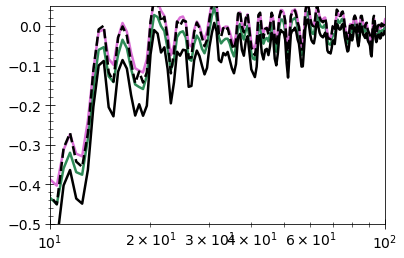

In [18]:
zg =  ds[exp].zgDE.rolling({'t':2}).mean('t')
zg0 =  exp: ds[exp].zgDE_gm.rolling({'t':2}).mean('t')
plt.plot(t_years,zg.differentiate('t')*magn,c='seagreen',label='$z_{g,0}^b$-REF')
plt.plot(t_years,(zg-zg0).differentiate('t')*magn,c='orchid',label='$\Delta\; z_{g}^b$-REF')

KN2_convective =ds[exp0]['KN2_convective_gm']*magn
KN2_diffusive = (ds[exp0]['KN2_diffusive_gm']+ds[exp0]['Gh_surf_gm']+ds[exp0]['Gh_hdiff_gm']+ds[exp0]['Gh_qsr_gm'])*magn
C = ds[exp0]['C_gm']*magn

plt.plot(x,(KN2_h_bot_to_top_convective + KN2_diffusive + C - thermobaric_correction[exp0]*magn) , label='Total-REF1', c='k', linestyle='--')
plt.plot(x,(KN2_h_bot_to_top_convective + KN2_diffusive + C) , label='Total-REF', c='k')

plt.xscale('log')
plt.xlim(10,100)
plt.ylim(-.5,0.05)

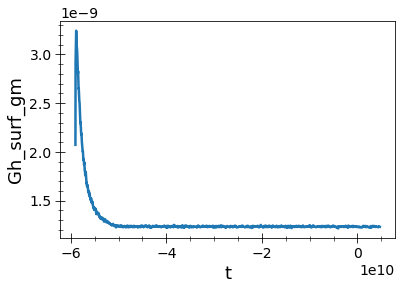

In [47]:
ds['Gh_surf_gm'].plot()

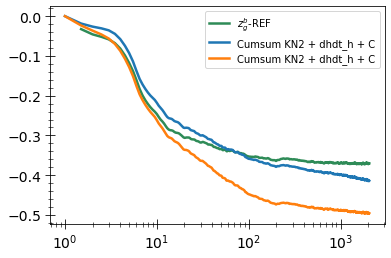

In [170]:
zg =  ds.zgDE.rolling({'t':2}).mean('t')
zg0 =  ds.zgDE_gm.rolling({'t':2}).mean('t')
magn=1e9
KN2_convective =ds['KN2_convective_gm']*magn
KN2_diffusive = (ds['KN2_diffusive_gm']+ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])*magn
C = ds['C_gm']*magn
plt.plot(t_years,zg,c='seagreen',label='$z_{g}^b$-REF')
#plt.plot(t_years,(zg-zg0),c='orchid',label='$\Delta\; z_{g}^b$-REF')

# plt.plot(t_years, (KN2_h_bot_to_top_convective + KN2_diffusive + C).cumsum('t')/magn*60*60*24*180, label='Cumsum KN2_conv + KN2_diff + C - 2*th_cor')
plt.plot(t_years, ((-KN2_tot2+ ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])*magn + C).cumsum('t')/magn*60*60*24*180, label='Cumsum KN2 + dhdt_h + C')
# plt.plot(t_years, ((KN2_tot1+ ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])*magn + C).cumsum('t')/magn*60*60*24*180, label='Cumsum KN2 + dhdt_h + C')
plt.plot(t_years, ((ds['KN2_diffusive_gm']+ds['KN2_convective_gm']+ ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])*magn + C).cumsum('t')/magn*60*60*24*180, label='Cumsum KN2 + dhdt_h + C')
#plt.plot(t_years, ((-KN2_tot+ ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])*magn + C).cumsum('t')/magn*60*60*24*180, label='Cumsum KN21 + dhdt_h + C')
# plt.plot(t_years, (KN2_tot + ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'] + C - thermobaric_correction*magn).cumsum('t')/magn*60*60*24*180, label='Cumsum KN2_conv + KN2_diff + C - th_cor')
plt.legend()
plt.xscale('log')

(-0.5, 0.05)

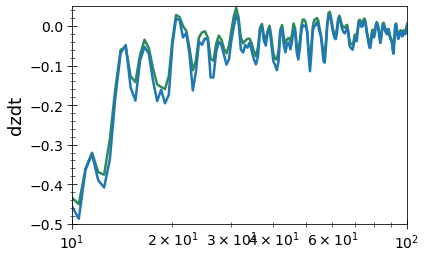

In [162]:
plt.plot(t_years,zg.differentiate('t')*magn,c='seagreen',label='$z_{g,0}^b$-REF')
plt.plot(t_years, ((-KN2_tot2+ ds['Gh_surf_gm']+ds['Gh_hdiff_gm']+ds['Gh_qsr_gm'])*magn + C), label='Cumsum KN2 + dhdt_h + C')
plt.xscale('log')
plt.ylabel('dzdt')
plt.xlim(10,100)
plt.ylim(-.5,0.05)